In [1]:
%matplotlib inline

In [2]:
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

In [3]:
from sage.all import *

In [4]:
from flowstar.reachability import Reach
from flowstar.poly import Poly
from lbuc import *

In [5]:
R, (x,y) = PolynomialRing(RIF, "x, y").objgens()

In [6]:
us = [x,y]
k=RIF(0.8); b=RIF(0.6); c=RIF(0.3); e=RIF(0.05); f=RIF(2)
vf = vector([b*x*(RIF(1)-x) - c*x*(k-x)*y,
            -e*y*(RIF(1)+y)+f*x*(k-x)*y])

In [7]:
odes_whelks = list(vf)

In [8]:
v2 = initials = [RIF(1, 1.2), RIF(4, 6)]

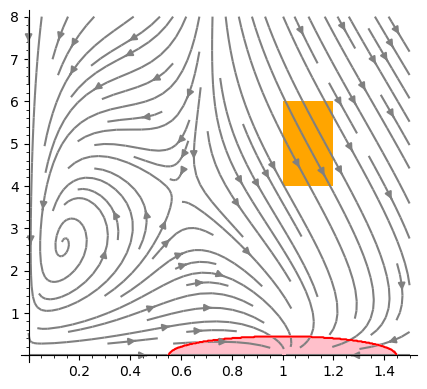

In [9]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + polygon([(v2[0].lower(), v2[1].lower()),
               (v2[0].lower(), v2[1].upper()),
               (v2[0].upper(), v2[1].upper()),
               (v2[0].upper(), v2[1].lower())],
              color='orange')\
    + region_plot((lambda x, y: (x - 1)**2 + y**2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()

In [10]:
P = Atomic((x - 1)**2 + y**2 - 0.2)

In [11]:
kwargs = dict(
    order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integration_method=IntegrationMethod.LOW_DEGREE,
    cutoff_threshold=1e-5,
    verbosity=0,
    epsilon_ctx=0.1,
    symbolic_composition=True,
)

In [12]:
from lbuc import InitialForm

In [13]:
sig = ({x: RIF(0.05, 0.1)} >> G(RIF(0, 0.2), P)
       ).signal_for_system(odes_whelks, initials, 10, **kwargs)

phi variables sfs = {y, x}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y}))
Computed 143 flowpipes in 0.7341463250340894 sec
mask = None
phi variables sfs = {y, x}
system sfs = System(R, (x, y), [[0.99863734049121122 .. 1.5959882046269048], [-0.18566626515230495 .. 6.0001133420806650]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y}))
Flowstar failed!
I  = [0.0000000000000000 .. 10.002000000000001]
fI = ['[0.99863734049121122 .. 1.5959882046269048]', '[-0.18566626515230495 .. 6.0001133420806650]']
C || f(I) = ['[0.99863734049121122 .. 1.595988

Computed 14 flowpipes in 0.08646789297927171 sec
In G.signal
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5dae89b280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = []
seg_domain = [0.0000000000000000 .. 0.206

Flowstar failed!
I  = [0.46884375000000000 .. 0.54698437500000008]
fI = ['[1.0618522982648672 .. 1.5471954628100999]', '[1.3947384837273815 .. 4.0053092288128643]']
C || f(I) = ['[1.0618522982648672 .. 1.5471954628100999]', '[1.3947384837273815 .. 4.0053092288128643]']
     odes = (1.1?, 5.?)
D || odes = (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y)
phi(D || odes, C || f(I)) = None
phi variables sfs = {y, x}
system sfs = System(R, (x, y), [[1.0734401260326769 .. 1.5719639955222958], [1.1328194291313433 .. 3.6653137451427811]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y}))
Flowstar failed!
I  = [0.54698437500000007 .. 0.62512500000000005]
fI = ['[1.07344012

Computed 15 flowpipes in 0.0973107940517366 sec
In G.signal
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5dae89b3a0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.16 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[

Computed 12 flowpipes in 0.06956504995469004 sec
In G.signal
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5dae89bee0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.12 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [

top-level root detection: 1 items in 0.12 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
I  = [1.2502500000000000 .. 2.5005000000000002]
fI = ['[1.1024292680261309 .. 1.5265972538243283]', '[-0.18566626515230495 .. 1.5500523120235264]']
C || f(I) = ['[1.1024292680261309 .. 1.5265972538243283]', '[-0.18566626515230495 .. 1.5500523120235264]']
     odes = (1.1?, 5.?)
D || odes = (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y)
phi(D || odes, C || f(I)) = None
bisecting [1.2502500000000000 .. 2.5005000000000002] -> [1.2502500000000000 .. 1.8753750000000001], [1.87537

Computed 9 flowpipes in 0.05479076795745641 sec
In G.signal
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d993465e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.08 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[

top-level root detection: 1 items in 0.08 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
I  = [1.5628125000000001 .. 1.8753750000000001]
fI = ['[1.1447451415733072 .. 1.4465176483377045]', '[-0.17846821293679466 .. 1.1032145754673586]']
C || f(I) = ['[1.1447451415733072 .. 1.4465176483377045]', '[-0.17846821293679466 .. 1.1032145754673586]']
     odes = (1.1?, 5.?)
D || odes = (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y)
phi(D || odes, C || f(I)) = None
bisecting [1.5628125000000001 .. 1.8753750000000001] -> [1.5628125000000001 .. 1.7190937500000001], [1.71909

top-level root detection: 1 items in 0.06 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
I  = [1.7190937500000000 .. 1.7972343750000000]
fI = ['[1.1506299151151169 .. 1.4098715336923414]', '[-0.16265761712407579 .. 0.95302241985266068]']
C || f(I) = ['[1.1506299151151169 .. 1.4098715336923414]', '[-0.16265761712407579 .. 0.95302241985266068]']
     odes = (1.1?, 5.?)
D || odes = (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y)
phi(D || odes, C || f(I)) = None
phi variables sfs = {y, x}
system sfs = System(R, (x, y), [[1.1447451415733072 .. 1.3980900481064265], [-0

D || odes = (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y)
phi(D || odes, C || f(I)) = None
phi variables sfs = {y, x}
system sfs = System(R, (x, y), [[1.1419749621454964 .. 1.3571855193297966], [-0.15882633529588866 .. 0.76659232783300014]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y}))
Computed 6 flowpipes in 0.04919520299881697 sec
In G.signal
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d993464c0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000

top-level root detection: 1 items in 0.04 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
I  = [2.1879375000000003 .. 2.3442187500000005]
fI = ['[1.1167263934175586 .. 1.3135015120325327]', '[-0.17123410778533238 .. 0.63932881624758509]']
C || f(I) = ['[1.1167263934175586 .. 1.3135015120325327]', '[-0.17123410778533238 .. 0.63932881624758509]']
     odes = (1.1?, 5.?)
D || odes = (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y)
phi(D || odes, C || f(I)) = None
bisecting [2.1879375000000003 .. 2.3442187500000005] -> [2.1879375000000003 .. 2.2660781250000004], [2.266

top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
I  = [2.4223593750000000 .. 2.5005000000000002]
fI = ['[1.1024292720891122 .. 1.2764205242182219]', '[-0.17057344708347802 .. 0.52120253604752942]']
C || f(I) = ['[1.1024292720891122 .. 1.2764205242182219]', '[-0.17057344708347802 .. 0.52120253604752942]']
     odes = (1.1?, 5.?)
D || odes = (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y)
phi(D || odes, C || f(I)) = None
phi variables sfs = {y, x}
system sfs = System(R, (x, y), [[1.0107493386729400 .. 1.2654668867885284], [-0

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
I  = [2.5005000000000001 .. 2.6567812499999999]
fI = ['[1.0872464441978546 .. 1.2654668867885284]', '[-0.16930786219199643 .. 0.49102910645378023]']
C || f(I) = ['[1.0872464441978546 .. 1.2654668867885284]', '[-0.16930786219199643 .. 0.49102910645378023]']
     odes = (1.1?, 5.?)
D || odes = (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y)
phi(D || odes, C || f(I)) = None
bisecting [2.5005000000000001 .. 2.6567812499999999] -> [2.5005000000000001 .. 2.5786406250000003], [2.578

top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
I  = [2.8130625000000000 .. 3.1256250000000004]
fI = ['[1.0631308717990188 .. 1.2252468345347248]', '[-0.13637097608058663 .. 0.38670415592968472]']
C || f(I) = ['[1.0631308717990188 .. 1.2252468345347248]', '[-0.13637097608058663 .. 0.38670415592968472]']
     odes = (1.1?, 5.?)
D || odes = (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y)
phi(D || odes, C || f(I)) = None
bisecting [2.8130625000000000 .. 3.1256250000000004] -> [2.8130625000000000 .. 2.9693437500000002], [2.969

Computed 2 flowpipes in 0.016612582025118172 sec
In G.signal
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5dae89ba60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = []
seg_domain = [0.0000000000000000 .. 0.206

In [14]:
ctx_sig = ({x: RIF(0.05, 0.1)} >> G(RIF(0, 0.2), P)
           ).context_signal_for_system(odes_whelks, initials, 10,
                                       initial_form=InitialForm.COMBINED,
                                       **kwargs)

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y}))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = <function C.context_signal.<locals>.signal_fn at 0x7fe62eca2430>, reach_tree = <lbuc.reach_trees.ReachTree object at 0x7fe62ec980a0>
recomputing reachset
setting reach level to 0
mask = None
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99863734049121122 .. 1.5959882046269048], [-0.18566626515230495 .. 6.0001133420806650]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'

C || f(I) = ['[0.99998486618648119 .. 1.5959882046269048]', '[0.061157558039720075 .. 6.0001133420806650]']
     odes = (1.1?, 5.?)
D || odes = (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y)
phi(D || odes, C || f(I)) = None
bisecting [0.0000000000000000 .. 1.2502499999999999] -> [0.0000000000000000 .. 0.62512499999999994], [0.62512499999999993 .. 1.2502499999999999]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[0.99998486618648119 .. 1.5719639955222958], [1.1328194291313433 .. 6.0001133420806650]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y}))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = fu

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7fe635b31940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7fe6245ba190>
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.00000000000

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7fe635b31ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7fe6245bf190>
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None

PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7fe635b31280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7fe6245c1190>
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None
Monitoring initial s

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7fe635b31ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7fe6245c1430>
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7fe635b31ee0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7fe6245c1190>
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7fe635b31ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7fe6245c1820>
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.14 seconds
roots = [[0.0000000000000000 .. 0.

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7fe635b31b80>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7fe6245c12e0>
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.15 seconds
roots = [[0.0000000000000000 .. 0.

top-level root detection: 1 items in 0.14 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None
Monitoring initial signal: 1 items in 0.22 seconds
(ContextSignal([0.0000000000000000 .. 0.20600000000000002], [[0.050000000000000002 .. 0.10000000000000001], None], [[-1 .. 1]], children=<lbuc.context_signals.ChildIterator object at 0x7fe6245c43d0>)).to_domain(0.01?)
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [], mask=None), reach_tree = None
(ContextSignal([0.0000000000000000 .. 0.0040000000000000001], [[0.0500000000000000

top-level root detection: 1 items in 0.16 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None
Monitoring initial signal: 1 items in 0.25 seconds
(ContextSignal([0.0000000000000000 .. 0.20600000000000002], [[0.050000000000000002 .. 0.10000000000000001], None], [[-1 .. 1]], children=<lbuc.context_signals.ChildIterator object at 0x7fe6399e6dc0>)).to_domain(0.01?)
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [], mask=None), reach_tree = None
(ContextSignal([0.0000000000000000 .. 0.0040000000000000001], [[0.0500000000000000

 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [], mask=None), reach_tree = None
(ContextSignal([0.0000000000000000 .. 0.0040000000000000001], [[0.050000000000000002 .. 0.10000000000000001], None], [[-1 .. 1]], children=<lbuc.context_signals.ChildIterator object at 0x7fe6399e67f0>)).to_domain(0.01?)
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.0020000000000000001], [], mask=None), reach_tree = None
I  = [1.2502499999999998 .. 1.5628124999999998]
fI = ['[1.1582814028218779 .. 1.5265972538243283]', '[-0.10188848333580615 .. 1.5500523120235266]']
C || f(I) = ['[1.1582814028218779 .. 1.5265972538243283]', '[-0.10188848333580615 .. 1.5500523120235266]']
     odes = (1.1?, 5.?)
D || odes = (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y)
phi(D || ode

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7fe635b31280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7fe6245c1190>
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.07 seconds
roots = [[0.0000000000000000 .. 0.

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7fe635b31ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7fe637f24820>
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.07 seconds
roots = [[0.0000000000000000 .. 0.

PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7fe635b31940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7fe637f24eb0>
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.05 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
d

phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.1024292680261309 .. 1.3740389657638921], [-0.18562900443548991 .. 0.82326466043493086]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y}))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2*x + 0.8000000000000000?)>, precompose_systems=False, initial_form=<InitialForm.COMBINED: 1>, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integration_method=<IntegrationMethod.LOW_DEGREE: 2>, cutoff_threshold=0.0000100000000000000, verbosity=0, epsilon_ctx=0.100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7fe63eee7040>, pri

top-level root detection: 1 items in 0.07 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None
Monitoring initial signal: 1 items in 0.13 seconds
(ContextSignal([0.0000000000000000 .. 0.20600000000000002], [[0.050000000000000002 .. 0.10000000000000001], None], [[-1 .. 1]], children=<lbuc.context_signals.ChildIterator object at 0x7fe6245c3580>)).to_domain(0.01?)
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [], mask=None), reach_tree = None
(ContextSignal([0.0000000000000000 .. 0.0040000000000000001], [[0.0500000000000000

top-level root detection: 1 items in 0.06 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None
Monitoring initial signal: 1 items in 0.12 seconds
(ContextSignal([0.0000000000000000 .. 0.20600000000000002], [[0.050000000000000002 .. 0.10000000000000001], None], [[-1 .. 1]], children=<lbuc.context_signals.ChildIterator object at 0x7fe62eca17c0>)).to_domain(0.01?)
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [], mask=None), reach_tree = None
(ContextSignal([0.0000000000000000 .. 0.0040000000000000001], [[0.0500000000000000

phi(D || odes, C || f(I)) = None
bisecting [2.1879374999999998 .. 2.5004999999999998] -> [2.1879374999999998 .. 2.3442187499999996], [2.3442187499999995 .. 2.5004999999999998]
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.1167263934175586 .. 1.3135015120325327], [-0.17123410778533238 .. 0.63932881624758509]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y}))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2*x + 0.8000000000000000?)>, precompose_systems=False, initial_form=<InitialForm.COMBINED: 1>, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integration_method=<IntegrationMethod.LOW_DEGREE: 2>, cutoff_threshold=0.0

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7fe635b31ca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7fe6245c1040>
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.03 seconds
roots = [[0.0000000000000000 .. 0.

top-level root detection: 1 items in 0.04 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None
Monitoring initial signal: 1 items in 0.09 seconds
(ContextSignal([0.0000000000000000 .. 0.20600000000000002], [[0.050000000000000002 .. 0.10000000000000001], None], [[-1 .. 1]], children=<lbuc.context_signals.ChildIterator object at 0x7fe62ec82250>)).to_domain(0.01?)
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [], mask=None), reach_tree = None
(ContextSignal([0.0000000000000000 .. 0.0040000000000000001], [[0.0500000000000000

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7fe6245ab3a0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7fe6245c1c10>
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.

phi(D || odes, C || f(I)) = None
phi variables sfs = {x, y}
system sfs = System(R, (x, y), [[1.0872464467383620 .. 1.2548850618184613], [-0.16621144631283941 .. 0.46065120131099674]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y}))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2*x + 0.8000000000000000?)>, precompose_systems=False, initial_form=<InitialForm.COMBINED: 1>, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integration_method=<IntegrationMethod.LOW_DEGREE: 2>, cutoff_threshold=0.0000100000000000000, verbosity=0, epsilon_ctx=0.100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetr

top-level root detection: 1 items in 0.02 seconds
roots = [[0.0000000000000000 .. 0.20599999999900002]]
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = [[0.0000000000000000 .. 0.20599999999900002]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None
Monitoring initial signal: 1 items in 0.08 seconds
(ContextSignal([0.0000000000000000 .. 0.20600000000000002], [[0.050000000000000002 .. 0.10000000000000001], None], [[-1 .. 1]], children=<lbuc.context_signals.ChildIterator object at 0x7fe6399e67f0>)).to_domain(0.01?)
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [], mask=None), reach_tree = None
(ContextSignal([0.0000000000000000 .. 0.0040000000000000001], [[0.0500000000000000

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7fe6245abb80>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7fe6245c1ac0>
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = [[0.0000000000000000 .. 0.

top-level root detection: 1 items in 0.02 seconds
roots = []
domain = [0.0000000000000000 .. 0.20600000000000002]
roots = []
seg_domain = [0.0000000000000000 .. 0.20600000000000002]
roots = []
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [([0.0000000000000000 .. 0.20600000000000002], False)], mask=None), reach_tree = None
Monitoring initial signal: 1 items in 0.06 seconds
(ContextSignal([0.0000000000000000 .. 0.20600000000000002], [[0.050000000000000002 .. 0.10000000000000001], None], [[-1 .. 1]], children=<lbuc.context_signals.ChildIterator object at 0x7fe62ec82a30>)).to_domain(0.01?)
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [([0.0000000000000000 .. 0.0040000000000000001], False)], mask=None), reach_tree = None
(ContextSignal([0.0000000000000000 .. 0.0040000000000000001], [[0.050000000000000002 .. 0.100000000000000

In [ ]:
refined_csig =({x: RIF(0.05, 0.1)} >> G(RIF(0, 0.2), P)
           ).context_signal_for_system(odes_whelks, initials, 10,
                                       refine=1,
                                       initial_form=InitialForm.SPLIT_VARS,
                                       **kwargs)

phi variables sfs = {y, x}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.2000000000000000], [4 .. 6]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y}))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = <function C.context_signal.<locals>.signal_fn at 0x7f5d9934dca0>, reach_tree = <lbuc.reach_trees.ReachTree object at 0x7f5dac06eb50>
contexts = ['[1.0..1.2]', '[4.0..6.0]']
statics  = []
recomputing reachset
setting reach level to 0
mask = None
phi variables sfs = {y, x}
system sfs = System(R, (x, y), [[0.99863734049219643 .. 1.5959882046270193], [-0.18566626515688304 .. 6.0001133420806659]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.05000000000000

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5dae89bb80>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5db0c8d820>
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5dae89bee0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5db0c8d820>
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d993465e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5db0c8d820>
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None

PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d99346820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5db0c8d820>
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None
Monitoring initial s

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d99346280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5d99366040>
 ==> creating ContextSignal with coord=(0, 0), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = 

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d99346dc0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5d99366430>
 ==> creating ContextSignal with coord=(0, 0), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = 

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d993463a0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5db0c8d820>
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.00000000000

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d99346160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5d99366040>
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.00000000000

PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d99346a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5db0c8d820>
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None
Monitoring initial s

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d993464c0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5db0c8d820>
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None

PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d993465e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5d99366c10>
 ==> creating ContextSignal with coord=(1, 0), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None
 ==> creating Co

setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5d99368820>
 ==> creating ContextSignal with coord=(1,), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None
 ==> creating ContextSignal with coord=(1,), signal = Signal([0.0000000000000000 .. 0.0040000000000000001], [], mask=None), reach_tree = None
 ==> creating ContextSignal with coord=(1,), signal = Signal([0.0000000000000000 .. 0.0020000000000000001], [], mask=None), reach_tree = None
 ==> creating ContextSignal with coord=(1, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2*x + 0.8000000000000000?)>, precompose_systems=False, initial_form=<InitialForm.SPLIT_VARS: 3>, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integration_method=<IntegrationMethod.LOW_DEGREE: 2>, cutoff_threshold=0.0000100000000000000, verbosity=0, epsilon_ctx=0.100000

PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5dae89ba60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5d99368820>
 ==> creating ContextSignal with coord=(1, 0), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None
 ==> creating Co

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d9937d160>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5db0c8d820>
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d9937d4c0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5db0c8d820>
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None

PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d9937d820>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5db0c8d820>
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None
Monitoring initial s

(ContextSignal([0.0000000000000000 .. 0.0040000000000000001], [[0.050000000000000002 .. 0.10000000000000001], None], [[-1 .. 1]], children=<lbuc.context_signals.ChildIterator object at 0x7f5d99367c40>)).to_domain(0.01?)
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.0020000000000000001], [], mask=None), reach_tree = None
 ==> creating ContextSignal with coord=(0,), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2*x + 0.8000000000000000?)>, precompose_systems=False, initial_form=<InitialForm.SPLIT_VARS: 3>, order=5, step=(0.0100000000000000, 0.500000000000000), precondition=1, estimation=0.00100000000000000, integration_method=<IntegrationMethod.LOW_DEGREE: 2>, cutoff_threshold=0.0000100000000000000, verbosity=0, epsilon_ctx=0.100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f5dae87dd00>, print_timings=False, unpreconditioning_order=5), reach_tree = <lbuc.

PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d9937ddc0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5d9930d040>
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None
 ==> creating Cont

PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d9937dee0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5d99366c10>
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None
 ==> creating Cont

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d9937d940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5d99366ac0>
 ==> creating ContextSignal with coord=(0, 0), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = 

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d9937d5e0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5d993662e0>
 ==> creating ContextSignal with coord=(0, 0), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = 

PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5d9937d280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5d9930d040>
 ==> creating ContextSignal with coord=(0, 0), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None
 ==> creating Co

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5dae89b280>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5d9930d820>
 ==> creating ContextSignal with coord=(0, 0), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = 

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5dae89bb80>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5d9930dc10>
 ==> creating ContextSignal with coord=(0, 0), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = 

recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.8000000000000000?, <flowstar.reachability.Reach object at 0x7f5dae89bca0>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, symbolic_composition=True, symbolic_composition_order=5, tentative_unpreconditioning=True, mask=None)
fprime = 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x
setting reach level to 0
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f5db0c8d820>
 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 0.20600000000000002], [], mask=None), reach_tree = None

In [ ]:
graphics_array(
    [
        sig.plot(),
        ctx_sig.signal.plot(),
        ctx_sig.refined_signal(1).plot(),
        ctx_sig.refined_signal(2).plot(),
        refined_csig.refined_signal(2).plot(),
    ],
    ncols=1
)